# Decision tree, Random forest, Linear Regression, XGBoost working , LSTM, ARIMA not working

In [ ]:
print("Stock Market forecasting using Machine Learning Techniques")

Stock Market forecasting using Machine Learning Techniques


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# The below command sets the backend of matplotlib to the 'inline' backend.
# It means the output ofplotting commands is displayed inline
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/ADANIPORTS.csv')
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
# view the dimensions of the dataset
df.shape

(3322, 15)

In [ ]:
# view the columns names of the dataset
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

3. Data processing


In [ ]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [ ]:
# view descriptive statistics
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [ ]:
df.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
# Checking for the null values
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

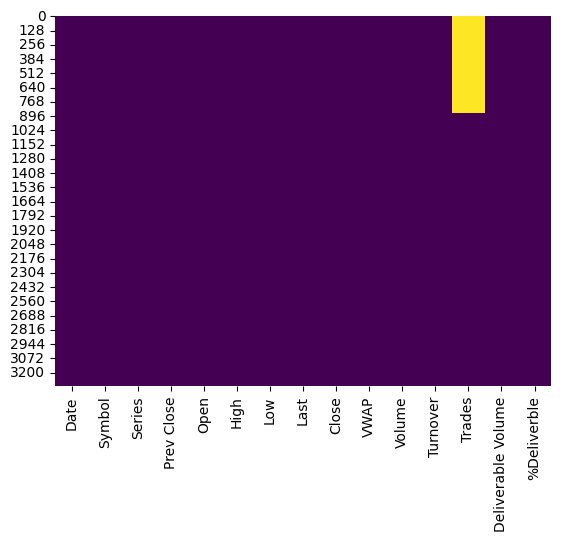

In [ ]:
# visualize missing data using heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

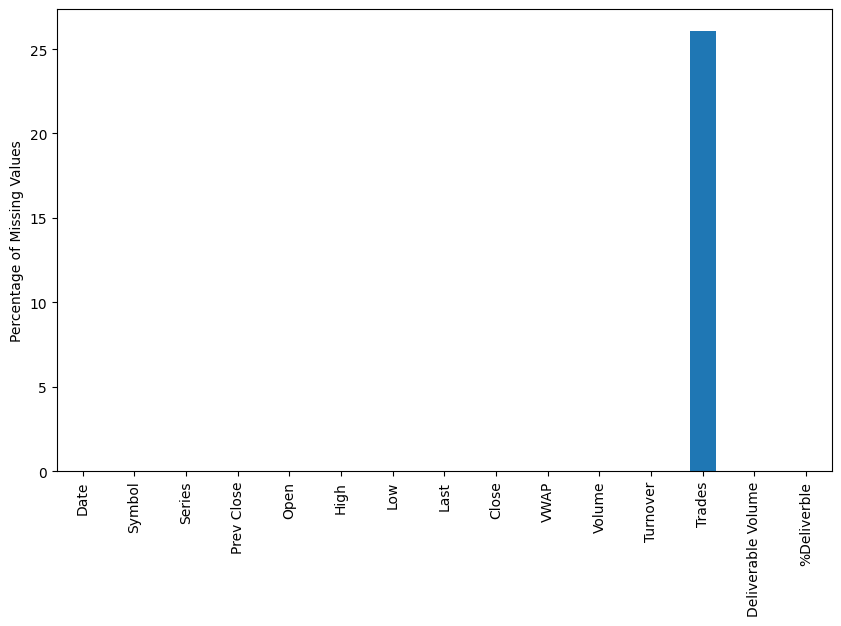

In [ ]:
# visualize missing data in form of percentage using bar plot
missing_percentage = df.isnull().mean() * 100
missing_percentage.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Percentage of Missing Values')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [ ]:
3.2

3.2

In [ ]:
# take one financial year of 2011-2012 because there are no null values after this year
stockprice_one_year = df[(df['Date'] > '2011-03-31') & (df['Date'] < '2012-04-01')]
stockprice_one_year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360846e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325451e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080279e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459164e+13,29996.0,1933482,0.6739


In [ ]:
stockprice_one_year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [ ]:
stockprice_one_year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,144.573293,144.885141,147.858635,141.528916,144.489357,144.544578,144.662289,1.535630e+06,2.207001e+13,13896.727273,9.089178e+05,0.534747
std,12.124482,12.221643,12.205498,12.348991,12.179215,12.151759,12.291169,1.673377e+06,2.535781e+13,7357.804577,1.350635e+06,0.137184
min,114.700000,117.500000,120.900000,111.000000,115.000000,114.700000,115.900000,2.209200e+04,3.235358e+11,417.000000,9.831000e+03,0.186900
25%,135.600000,135.000000,137.950000,131.950000,135.000000,135.500000,135.080000,7.216570e+05,1.043463e+13,8995.000000,3.379690e+05,0.438000
50%,146.800000,147.100000,149.800000,143.750000,146.600000,146.800000,146.690000,1.145520e+06,1.675321e+13,12293.000000,6.325790e+05,0.542200
75%,154.750000,155.050000,157.750000,151.650000,154.400000,154.750000,155.010000,1.744030e+06,2.530024e+13,17565.000000,1.029768e+06,0.620800
max,165.000000,165.050000,170.450000,163.550000,165.400000,165.000000,166.370000,2.066316e+07,3.322895e+14,46546.000000,1.726969e+07,0.943300


In [ ]:

stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 826 to 1074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                249 non-null    object 
 1   Symbol              249 non-null    object 
 2   Series              249 non-null    object 
 3   Prev Close          249 non-null    float64
 4   Open                249 non-null    float64
 5   High                249 non-null    float64
 6   Low                 249 non-null    float64
 7   Last                249 non-null    float64
 8   Close               249 non-null    float64
 9   VWAP                249 non-null    float64
 10  Volume              249 non-null    int64  
 11  Turnover            249 non-null    float64
 12  Trades              209 non-null    float64
 13  Deliverable Volume  249 non-null    int64  
 14  %Deliverble         249 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 39.2

In [ ]:
4

4

<Axes: >

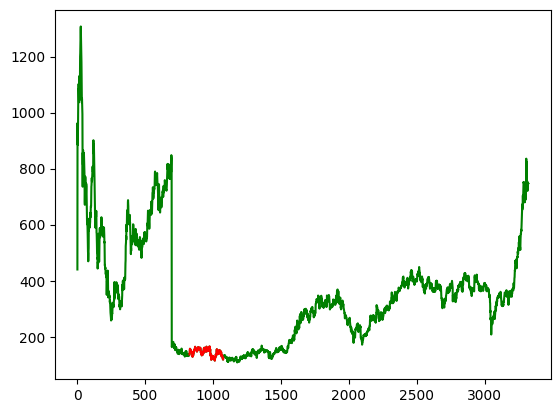

In [ ]:
pl = df['Prev Close'].plot(c='green')
stockprice_one_year['Prev Close'].plot(c='red', ax=pl)

<Axes: >

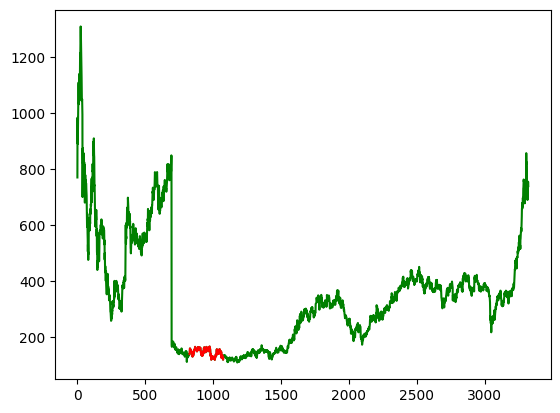

In [ ]:
pl = df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(c='red', ax=pl)

<Axes: >

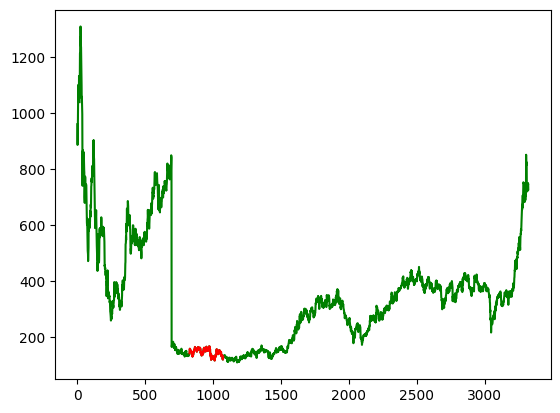

In [ ]:
pl = df['Last'].plot(c='green')
stockprice_one_year['Last'].plot(c='red', ax=pl)

<Axes: >

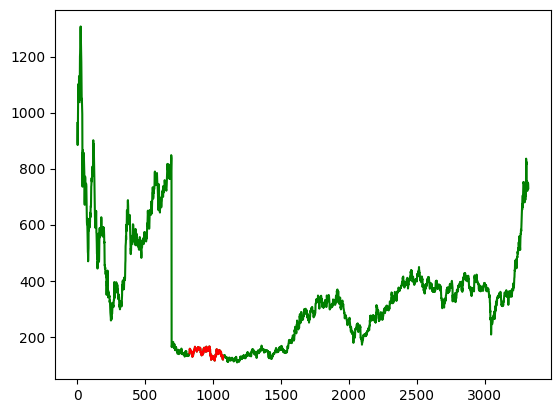

In [ ]:
pl = df['Close'].plot(c='green')
stockprice_one_year['Close'].plot(c='red', ax=pl)

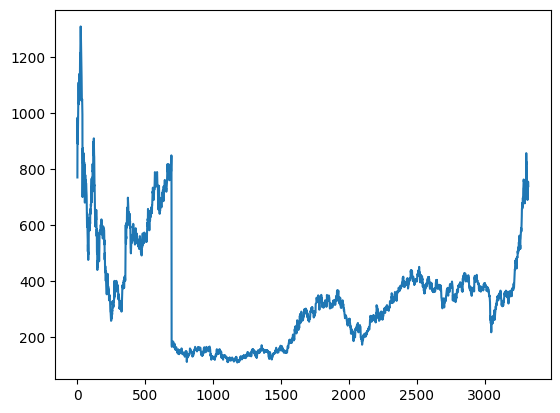

In [ ]:
plt.plot(df['Open'])

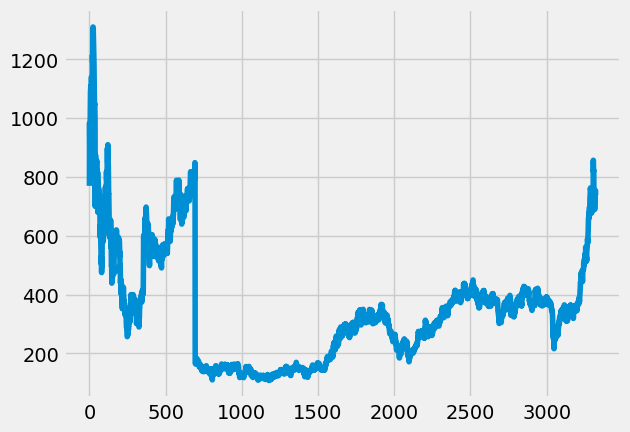

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

In [ ]:
4.3

4.3

<Axes: >

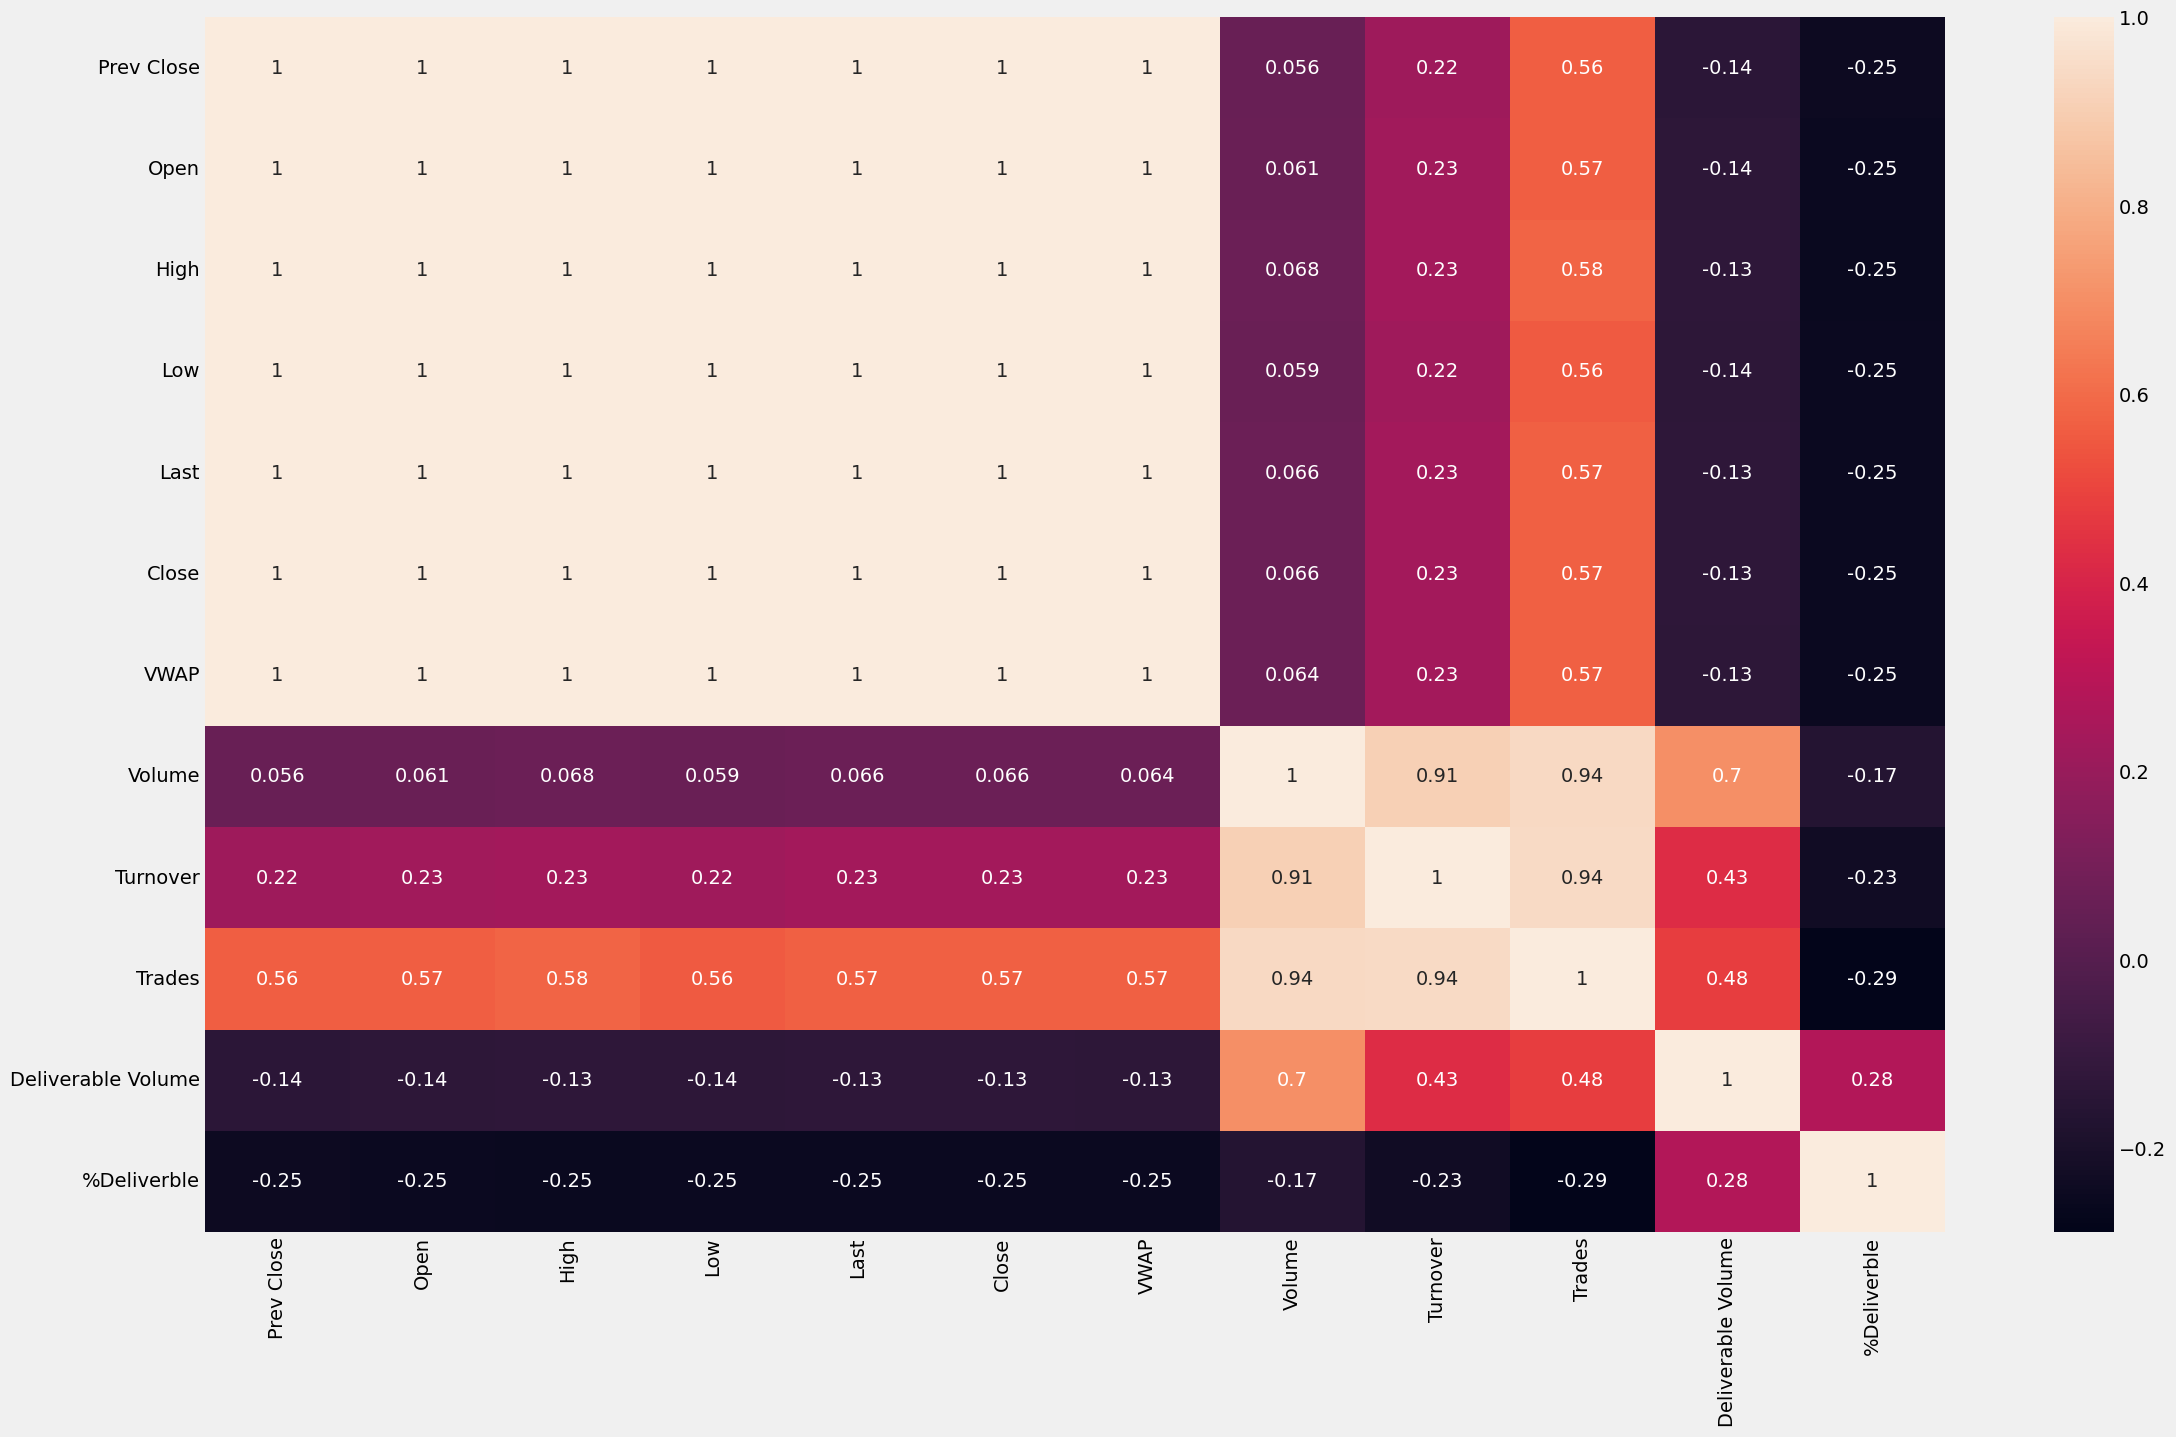

In [ ]:
# correlation for all the dataset
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(method='pearson'), annot=True)

<Axes: >

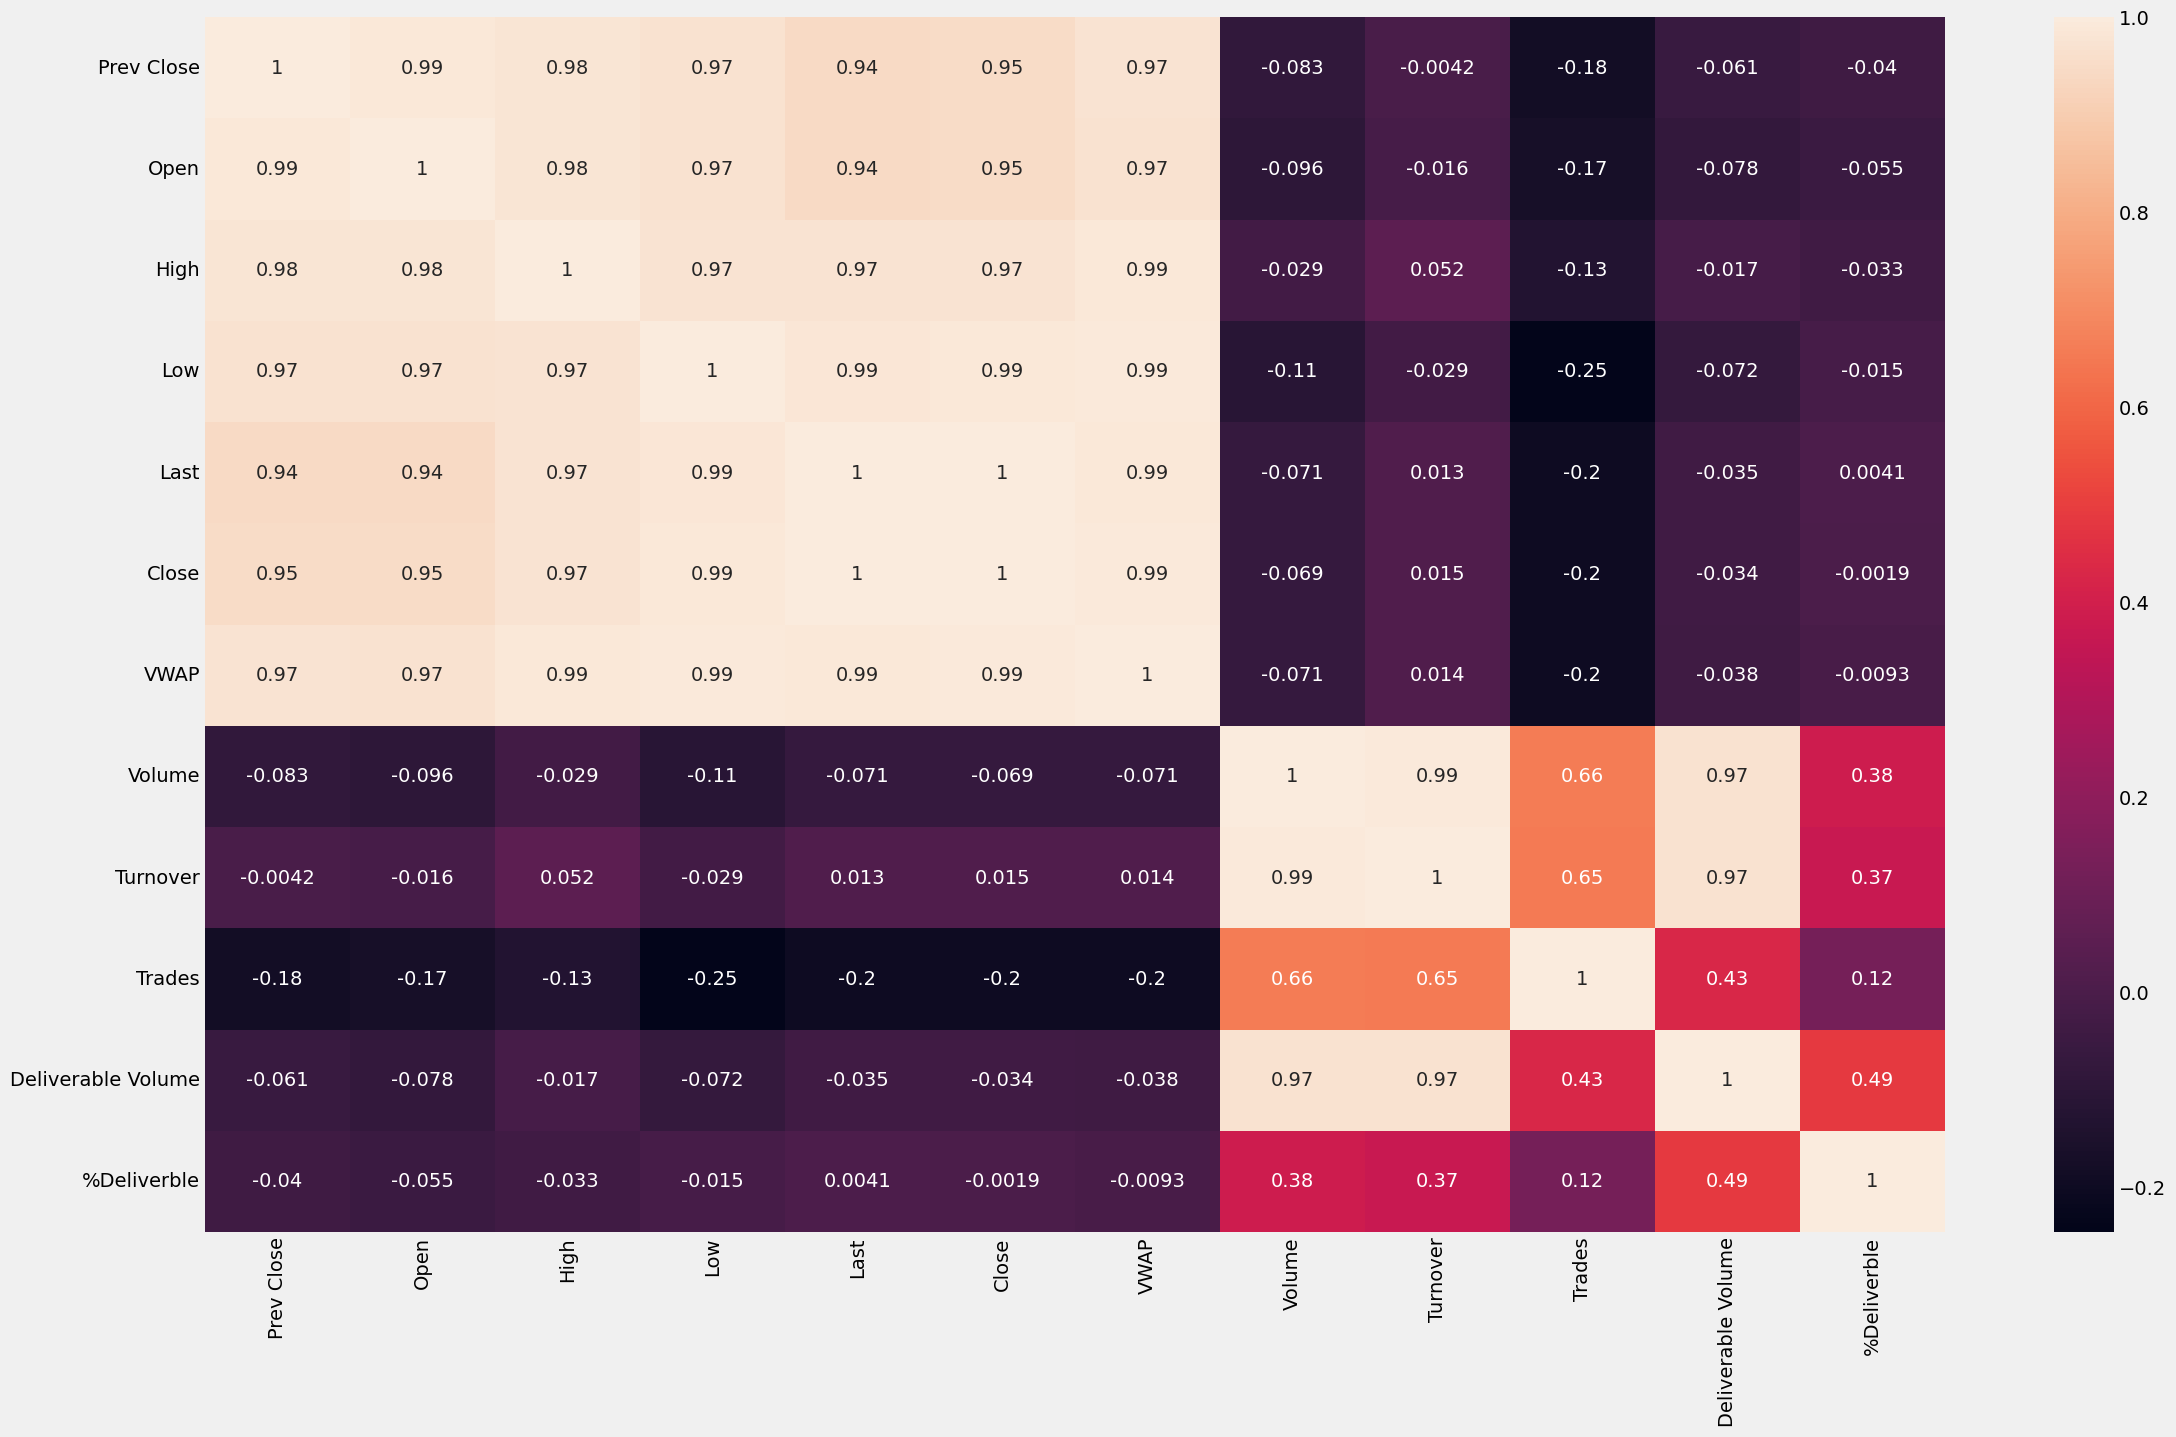

In [ ]:
# correlation of the one year data
plt.figure(figsize=(25,15))
sns.heatmap(stockprice_one_year.corr(method='pearson'), annot=True)

<Axes: xlabel='Date'>

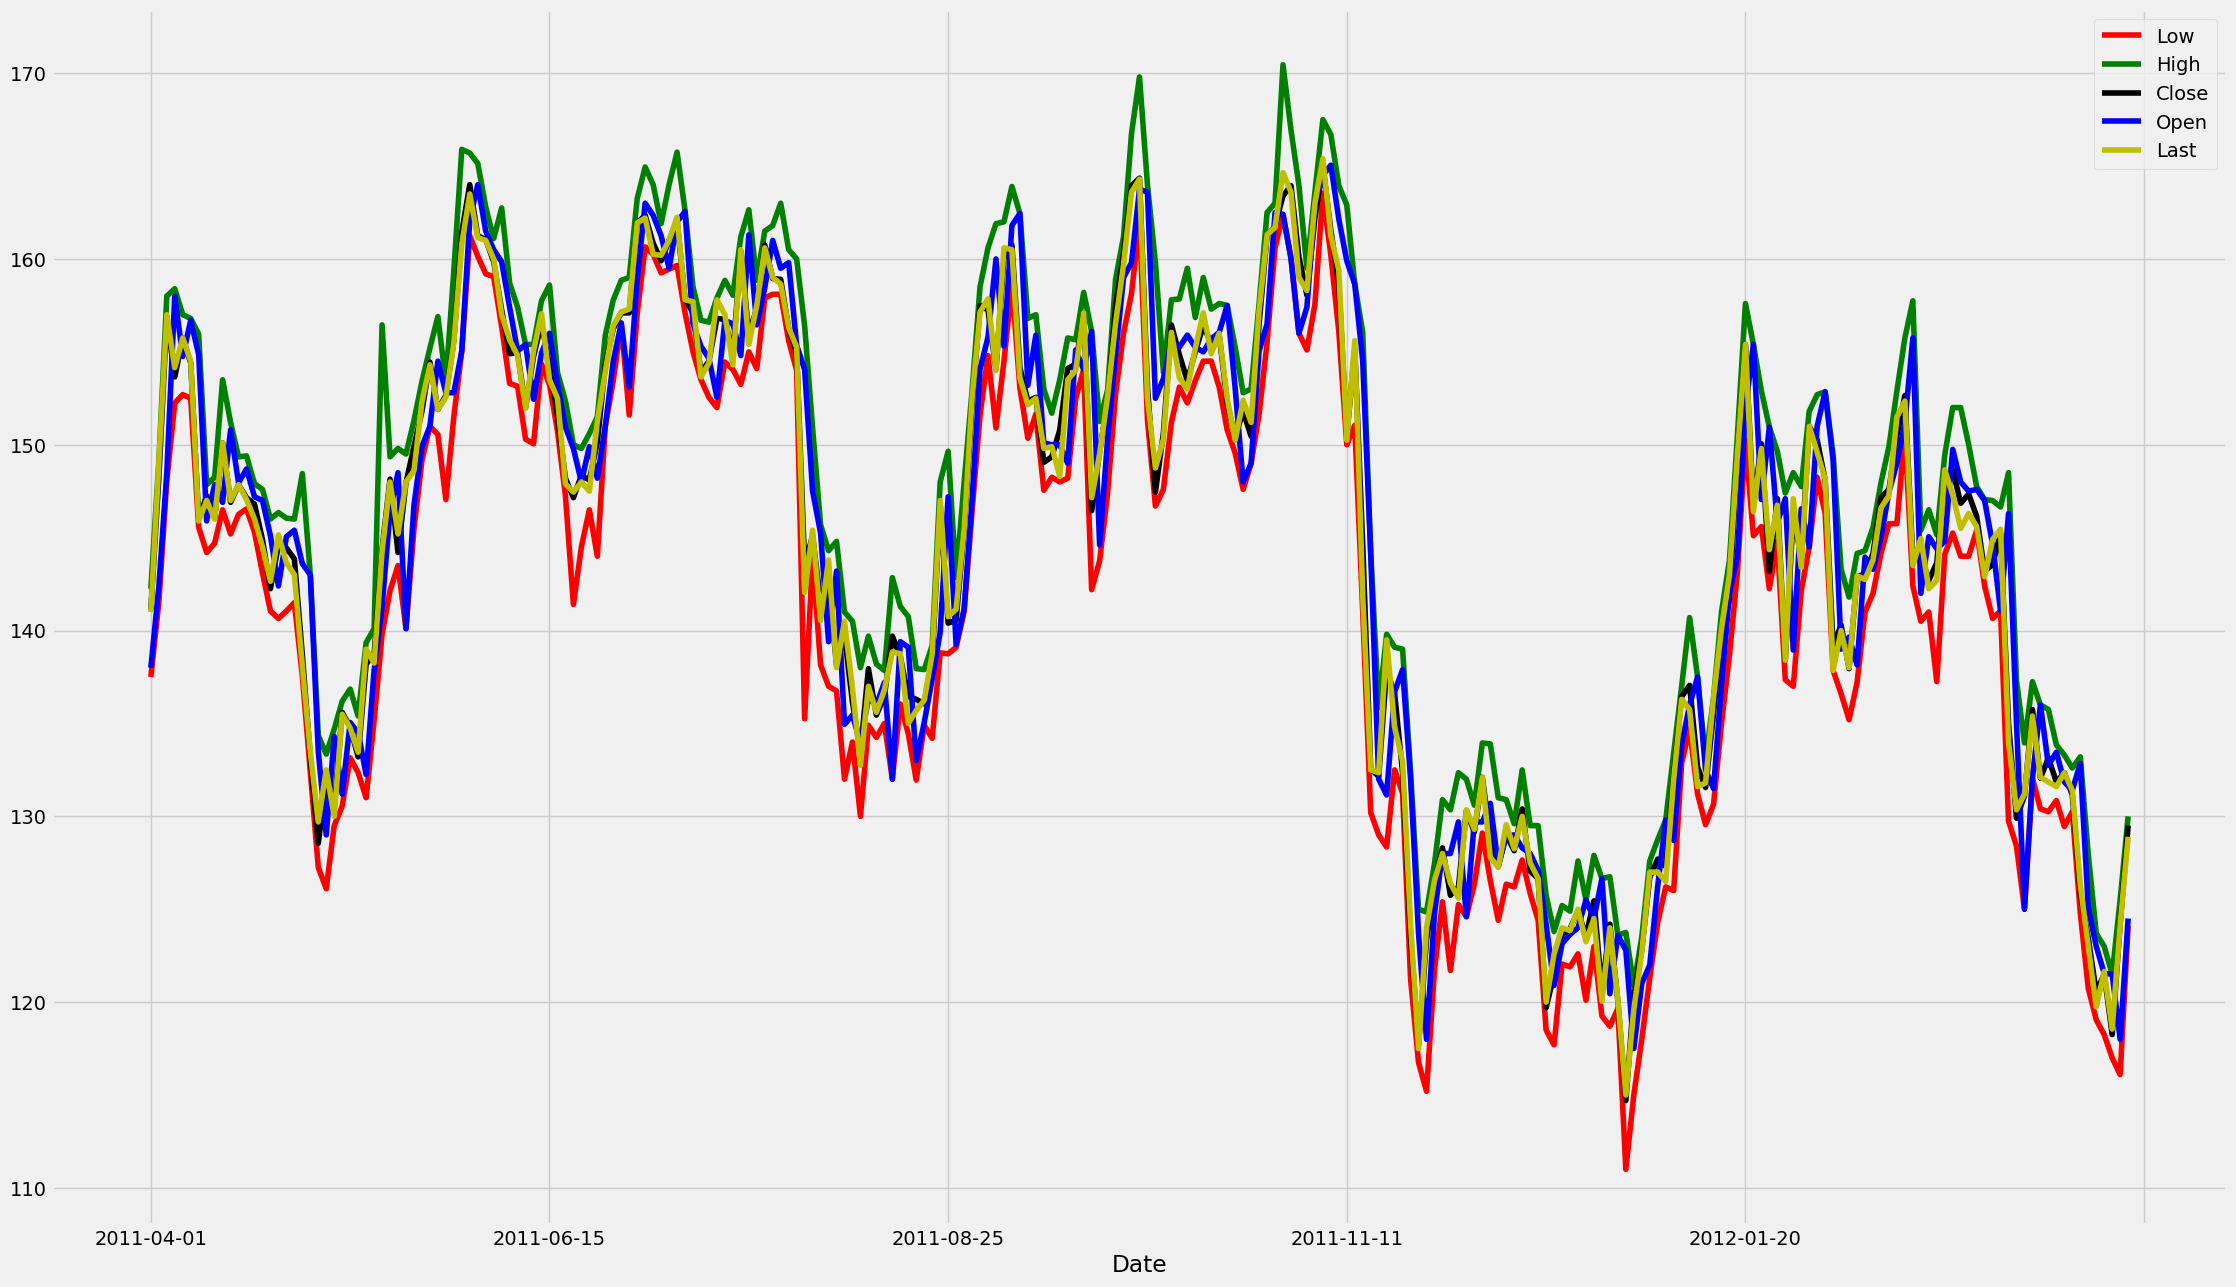

In [ ]:
stockprice_one_year.plot(x='Date', y=['Low','High', 'Close', 'Open', 'Last'], color=['r','g','k','b','y'], figsize=[25,15])

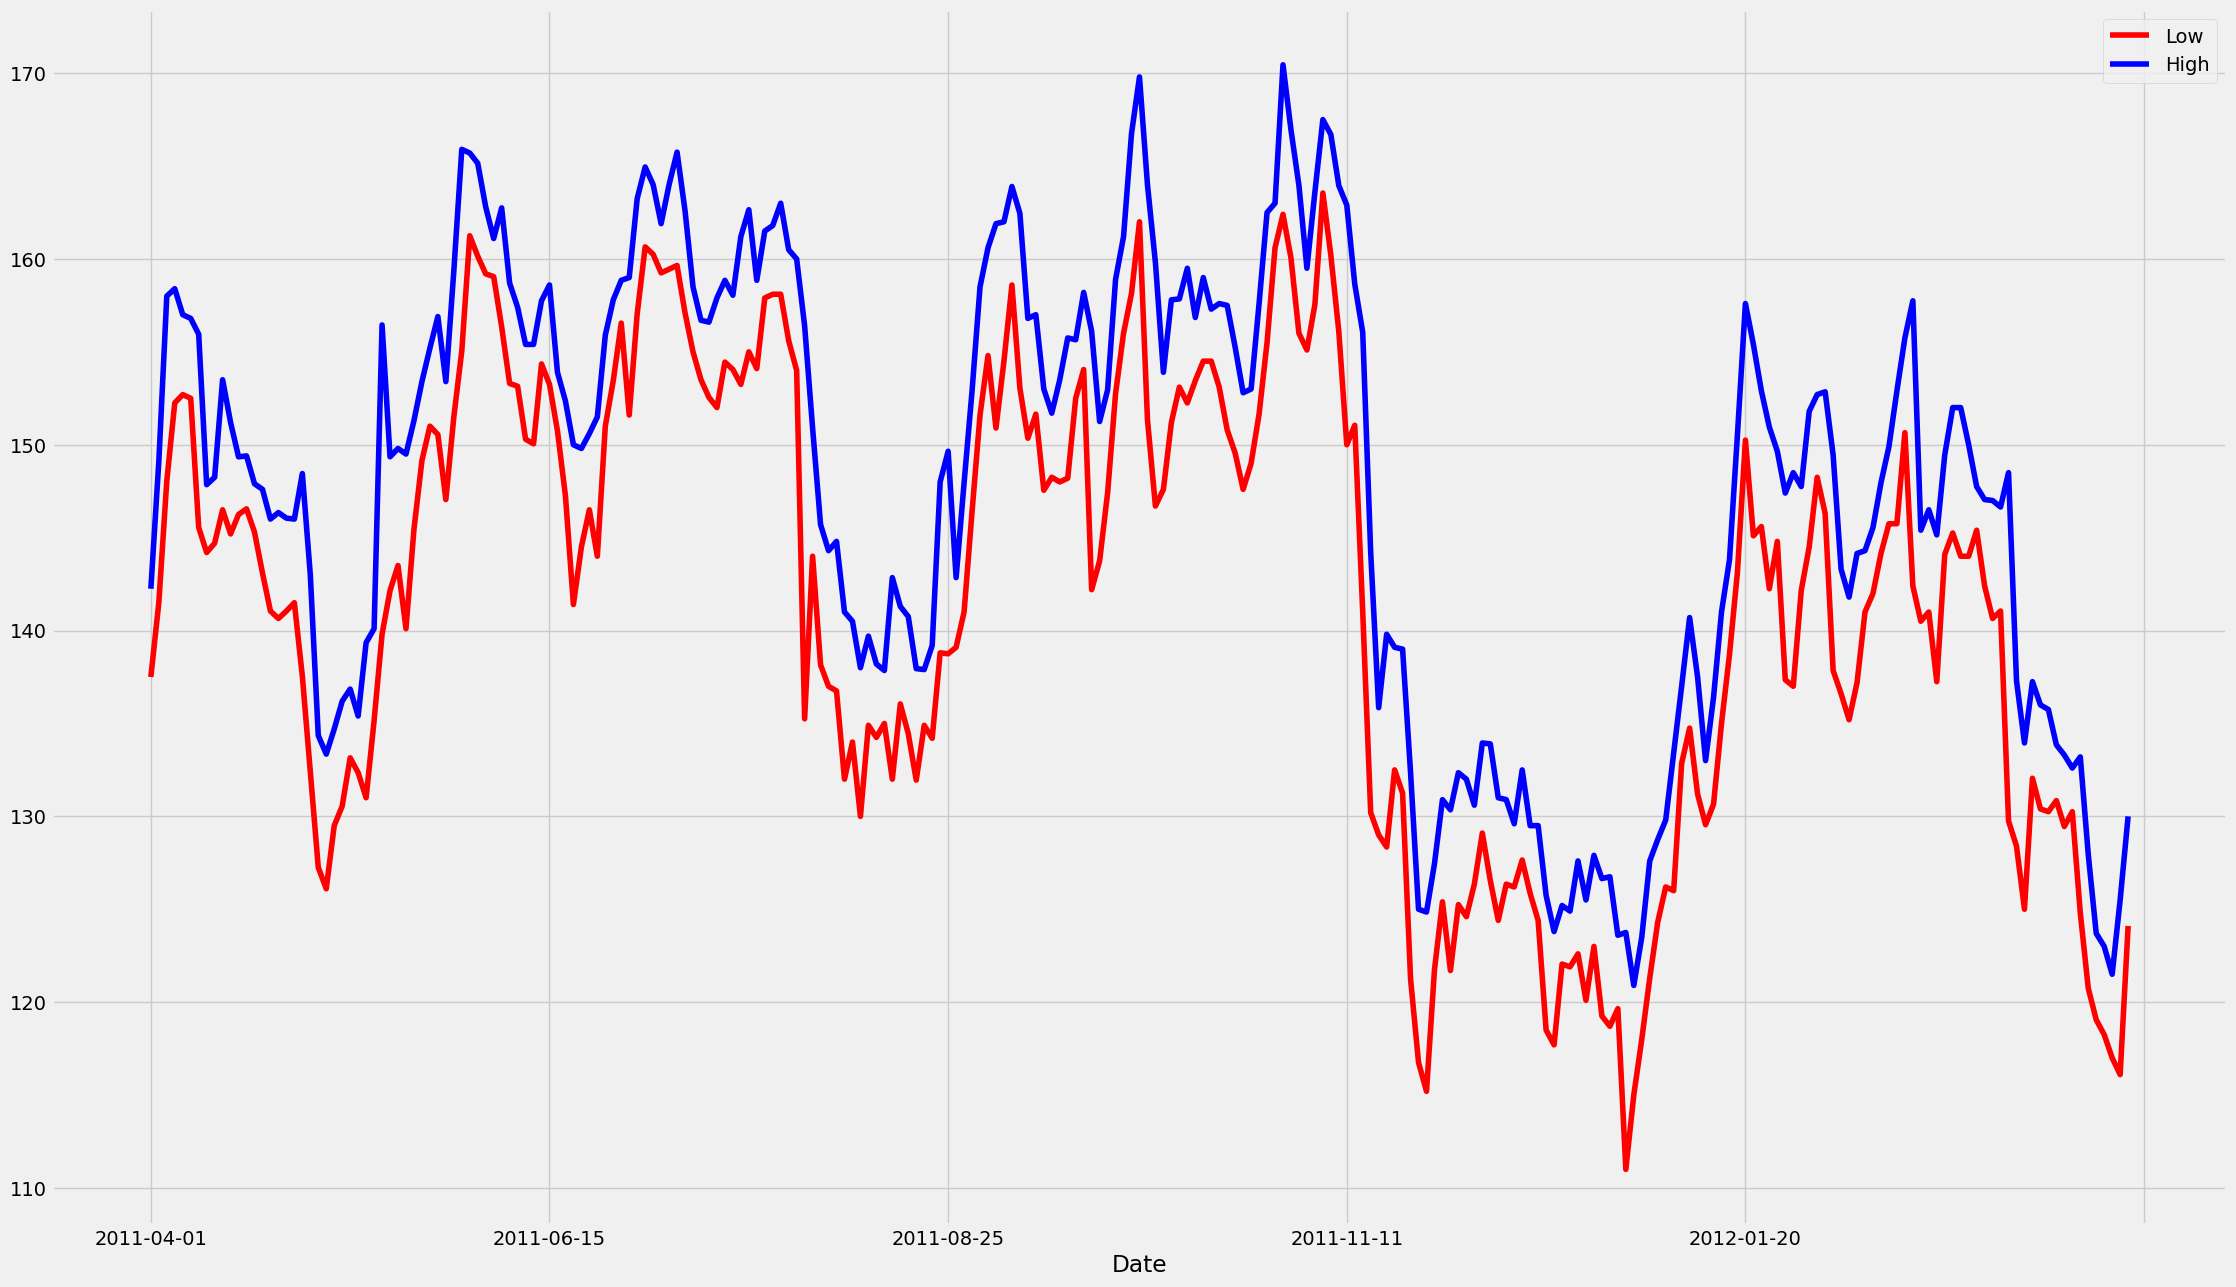

In [ ]:
stockprice_one_year.plot(x='Date', y=['Low', 'High'], color=['r','b'], figsize=[25,15])
plt.show()

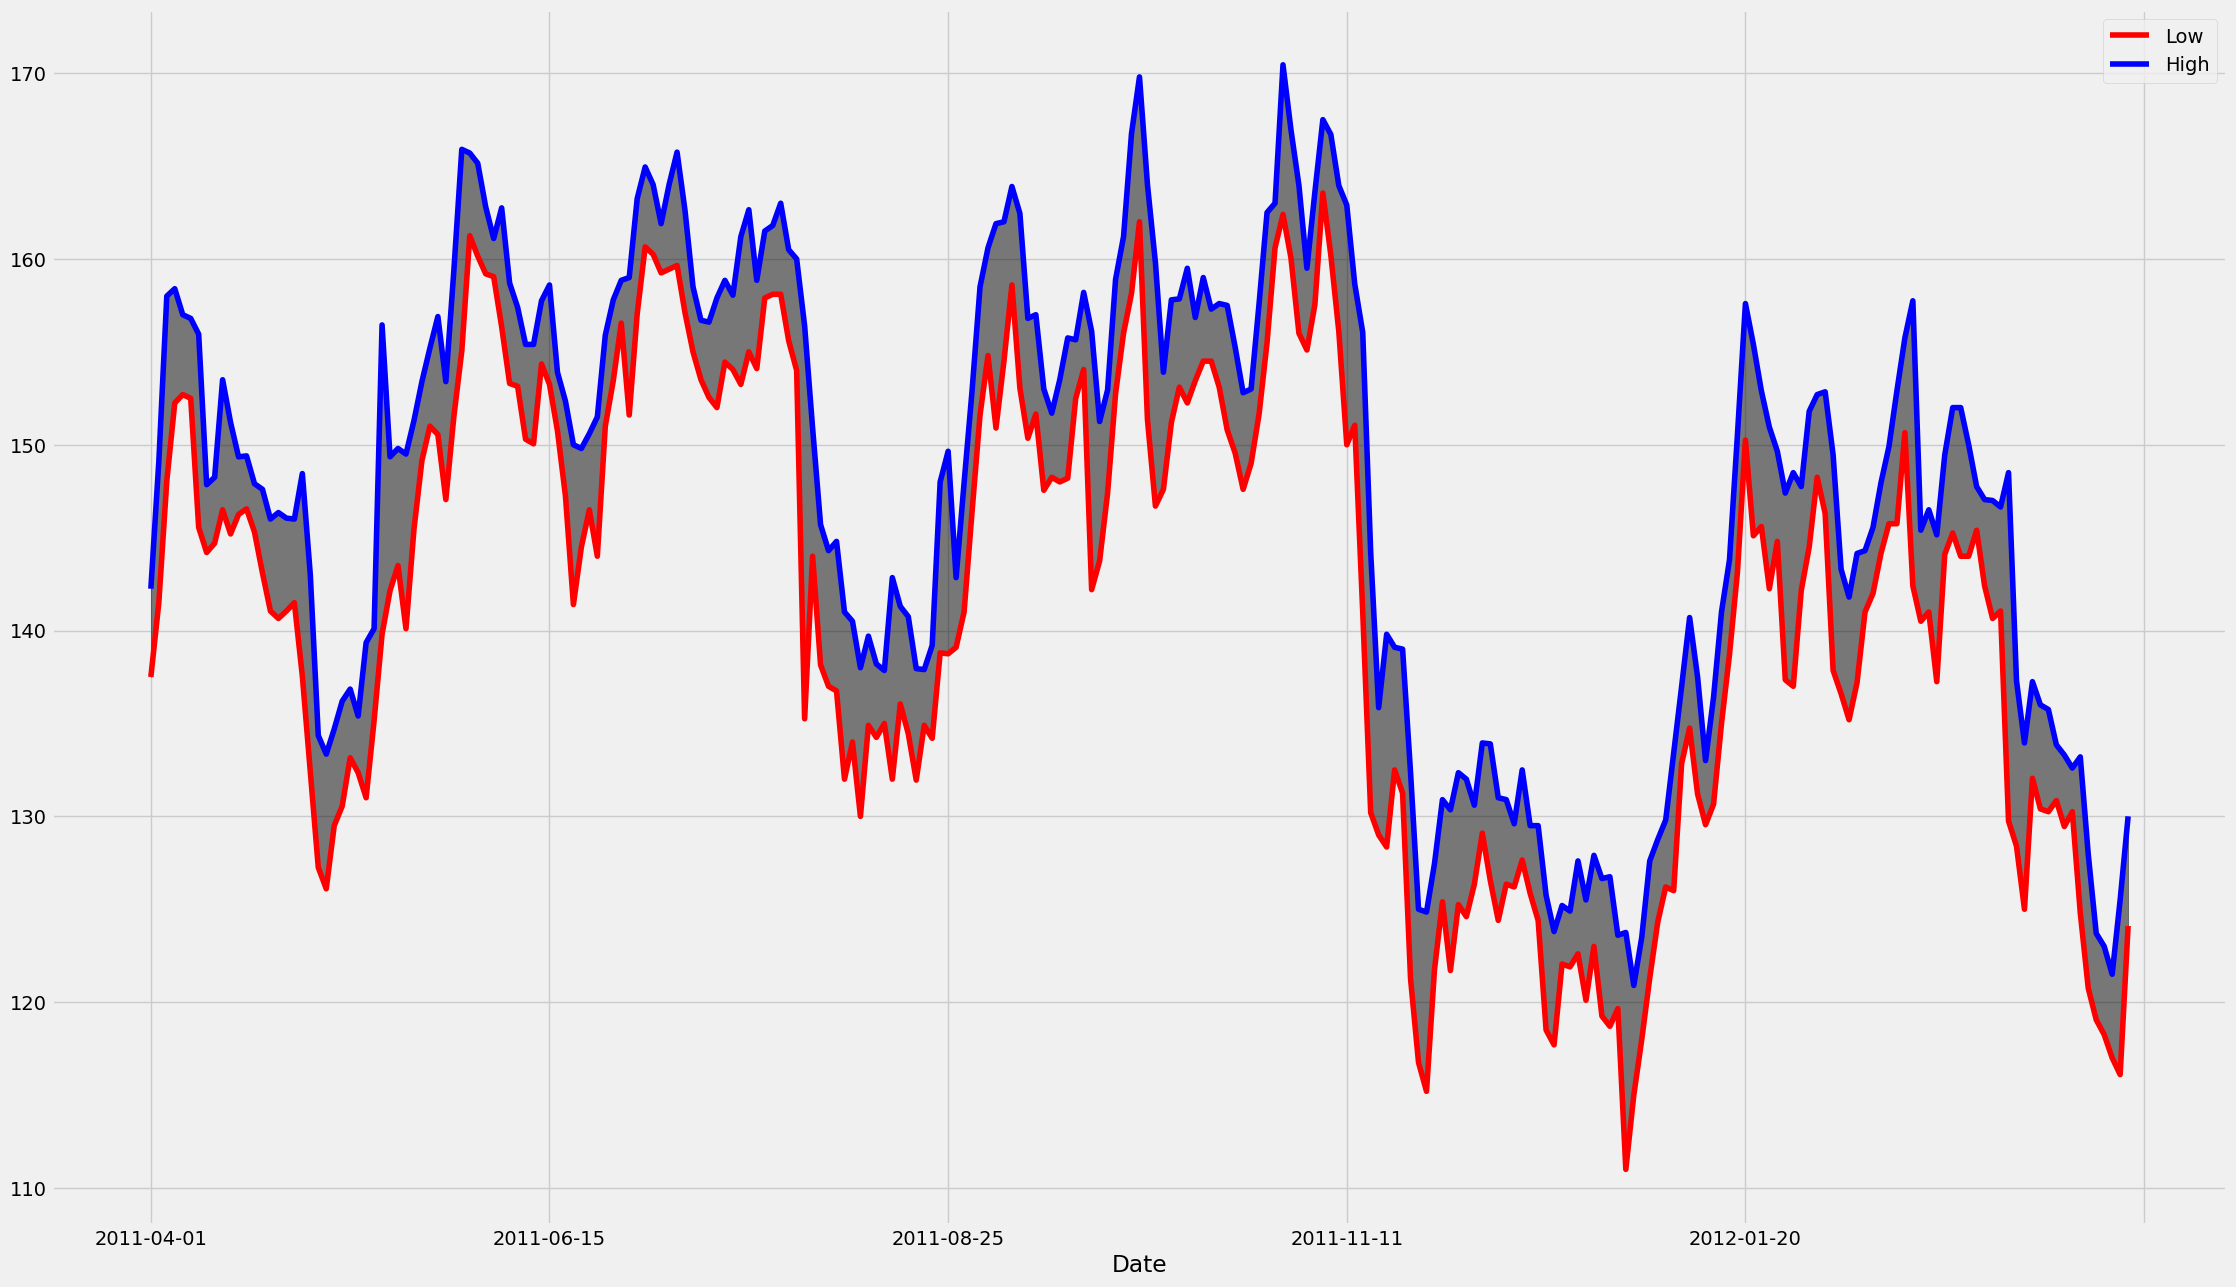

In [ ]:
stockprice_one_year.plot(x='Date', y=['Low', 'High'], color=['r','b'], figsize=[25,15])
plt.fill_between(stockprice_one_year['Date'], stockprice_one_year['Low'], stockprice_one_year['High'], color='k',alpha=0.5)
plt.show()

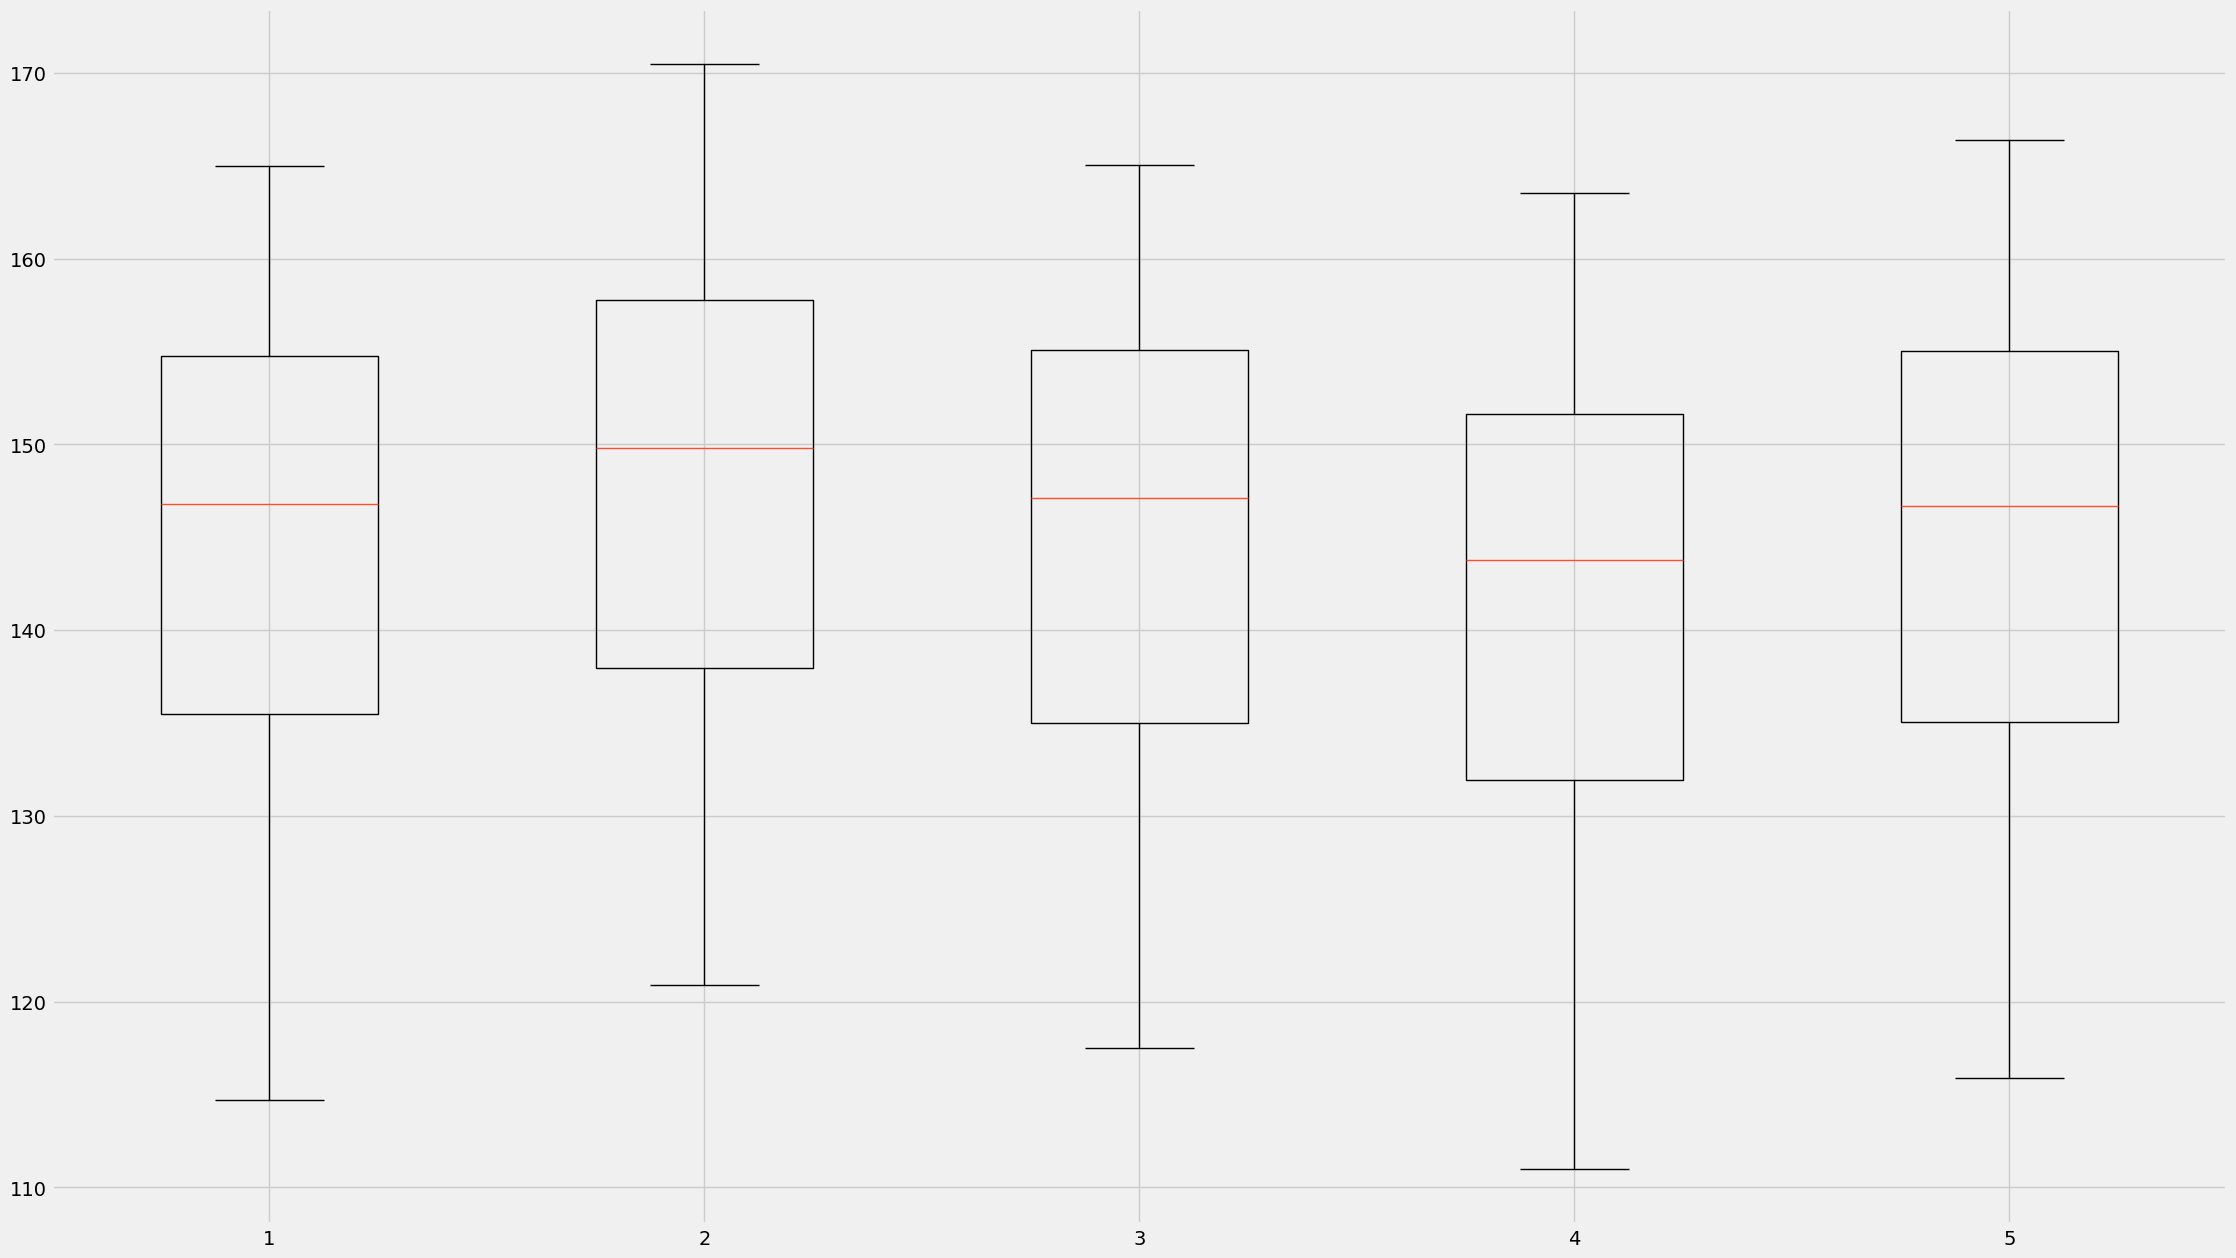

In [ ]:
plt.figure(figsize=(25,15))
plt.boxplot(stockprice_one_year[['Close','High','Open','Low','VWAP']])
plt.show()

In [ ]:
data = df[['Date','Open', 'High','Low', 'Volume', 'VWAP']]

In [ ]:
df.set_index('Date', drop=False, inplace=True)

<Axes: xlabel='Date'>

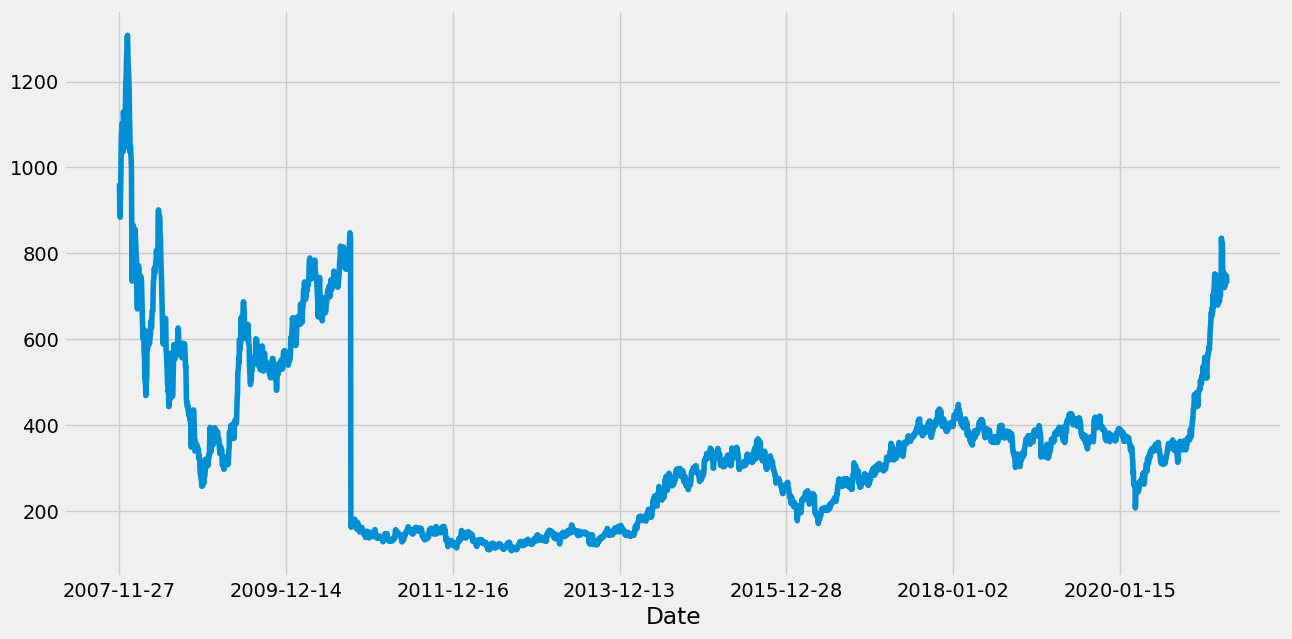

In [ ]:
df['Close'].plot(figsize=(14,7))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Volume  3322 non-null   int64  
 5   VWAP    3322 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ['Open', 'High', 'Low','VWAP']
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window = window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window = window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')


In [ ]:
# check modified features
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619,0.3612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278,0.3172,770.000000,NaN,1050.000000,NaN,770.000000,NaN,984.719971,NaN
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678,0.2088,877.000000,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913,0.2735,887.666687,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123,0.2741,927.666687,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.set_index('Date', drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619,0.3612,344.659943,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278,0.3172,770.000000,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678,0.2088,877.000000,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913,0.2735,887.666687,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123,0.2741,927.666687,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066


In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['day_of_week'] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


In [ ]:
df = df.drop(columns=['Symbol', 'Series'])
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


# dividing data for traina and test

In [ ]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [ ]:
df_valid.shape

(823, 24)

In [ ]:

!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


In [ ]:
# splittinf the data

In [ ]:
X_train = df_train.drop(columns=['Close', 'Date'])
X_train.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,440.00,770.00,1050.00,770.0,959.0,984.72,27294366,2.687719e+15,44922.588355,9859619,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,962.90,984.00,990.00,874.0,885.0,941.38,4581338,4.312765e+14,44922.588355,1453278,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,893.90,909.00,914.75,841.0,887.0,888.09,5124121,4.550658e+14,44922.588355,1069678,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,884.20,890.00,958.00,890.0,929.0,929.17,4609762,4.283257e+14,44922.588355,1260913,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,921.55,939.75,995.00,922.0,980.0,965.65,2977470,2.875200e+14,44922.588355,816123,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


In [ ]:
X_train.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble',
       'Open_mean_lag3', 'Open_std_lag7', 'High_mean_lag3', 'High_std_lag7',
       'Low_mean_lag3', 'Low_std_lag7', 'VWAP_mean_lag3', 'VWAP_std_lag7',
       'month', 'day', 'day_of_week'],
      dtype='object')

In [ ]:
X_train.dtypes

Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
Open_mean_lag3        float32
Open_std_lag7         float32
High_mean_lag3        float32
High_std_lag7         float32
Low_mean_lag3         float32
Low_std_lag7          float32
VWAP_mean_lag3        float32
VWAP_std_lag7         float32
month                   int64
day                     int64
day_of_week             int64
dtype: object

In [ ]:
X_train.shape

(2499, 22)

In [ ]:
# Splitting data based on condition 2018
y_train = df_train['Close']
# scaler = MinMaxScaler(feature_range=(0,1))

# y_train = scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_train.shape

(2499,)

In [ ]:
# X_valid ?

In [ ]:
X_valid = df_valid.drop(columns=['Close', 'Date'])
X_valid.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,405.65,406.70,407.70,398.05,400.20,402.01,2701537,1.086041e+14,43408.0,1635026,...,1.521982,406.350006,1.549923,399.183319,1.200248,402.543335,1.556223,1,1,0
2018-01-02,399.65,403.45,403.45,395.00,397.85,398.09,1322980,5.266609e+13,31322.0,388539,...,1.865476,406.583344,1.516026,398.299988,1.302516,401.783325,1.637472,1,2,1
2018-01-03,397.40,398.10,410.90,397.45,408.75,406.82,4679468,1.903705e+14,63719.0,999388,...,1.853568,406.100006,1.962142,397.450012,1.922641,401.103333,2.411082,1,3,2
2018-01-04,407.65,408.70,410.70,406.05,410.00,409.19,1990506,8.144965e+13,26844.0,525027,...,2.923305,407.350006,2.361396,396.833344,1.940974,402.306671,2.843346,1,4,3
2018-01-05,409.85,411.90,426.95,410.20,423.65,421.86,5448214,2.298384e+14,59661.0,1233903,...,3.569514,408.350006,2.747878,399.500000,3.509918,404.700012,3.805025,1,5,4


In [ ]:
X_valid.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble',
       'Open_mean_lag3', 'Open_std_lag7', 'High_mean_lag3', 'High_std_lag7',
       'Low_mean_lag3', 'Low_std_lag7', 'VWAP_mean_lag3', 'VWAP_std_lag7',
       'month', 'day', 'day_of_week'],
      dtype='object')

In [ ]:
X_valid.dtypes

Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
Open_mean_lag3        float32
Open_std_lag7         float32
High_mean_lag3        float32
High_std_lag7         float32
Low_mean_lag3         float32
Low_std_lag7          float32
VWAP_mean_lag3        float32
VWAP_std_lag7         float32
month                   int64
day                     int64
day_of_week             int64
dtype: object

In [ ]:
X_valid.shape

(823, 22)

In [ ]:
y_valid = df_valid['Close']


# y_valid = scaler.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_valid.shape


# scaler1 = MinMaxScaler(feature_range=(0,1))
# y_valid1 = scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
# y_validn = df_valid['Close'].to_numpy().reshape(-1,1)

(823,)

# Apply decision tree

In [ ]:
# from sklearn.svm import SVC
# model = SVC(kernel='linear')  # You can choose 'linear', 'rbf', or other kernels


In [ ]:
# model.fit(X_train, y_train)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()


In [ ]:
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_valid)
# y_pred = pd.DataFrame(y_pred)
# y_pred.shape

In [ ]:
y_valid.shape

(823,)

In [ ]:
# display the result in graph form

In [ ]:
# pip install mplfinance


In [ ]:
data = df['Close'].values.reshape(-1, 1)

In [ ]:
data.shape

(3322, 1)

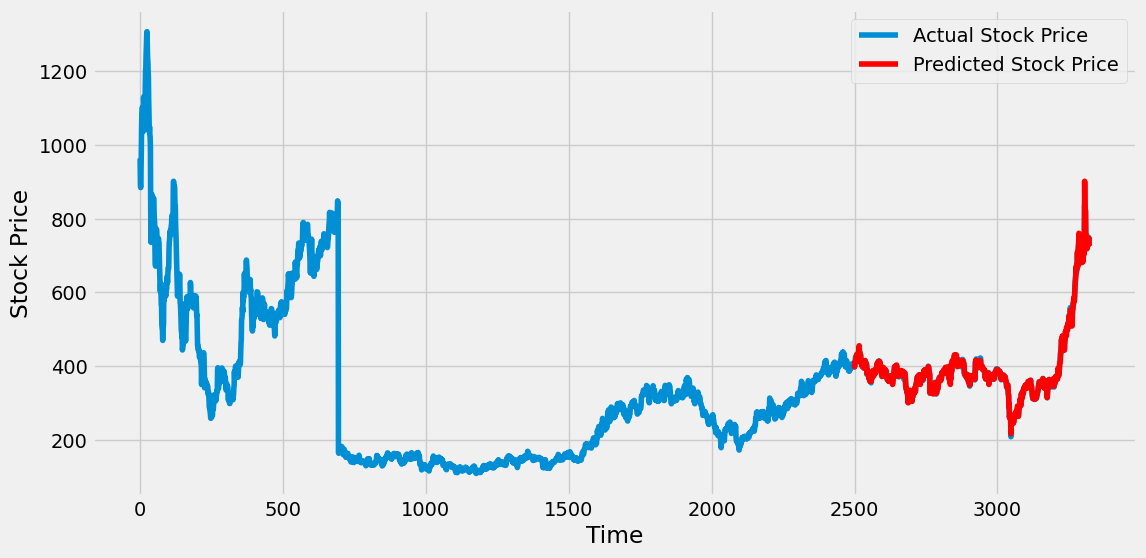

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your actual stock prices and predicted_price is the predicted prices for the last part of the timeframe

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual stock prices for the entire timeframe
plt.plot(data, label='Actual Stock Price')

# Plot the predicted prices, starting from the index where they overlap with actual data
plt.plot(range(len(data) - len(y_pred), len(data)), y_pred, color='red', label='Predicted Stock Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_valid contains actual values and y_pred contains predicted values

# Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_valid, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 12.759553462940458
Mean Absolute Error: 1.9688335358444702
R-squared (R2) Score: 0.9986549110548097


# Apply Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_valid)


In [ ]:
data = df['Close'].values.reshape(-1, 1)

In [ ]:
data.shape

(3322, 1)

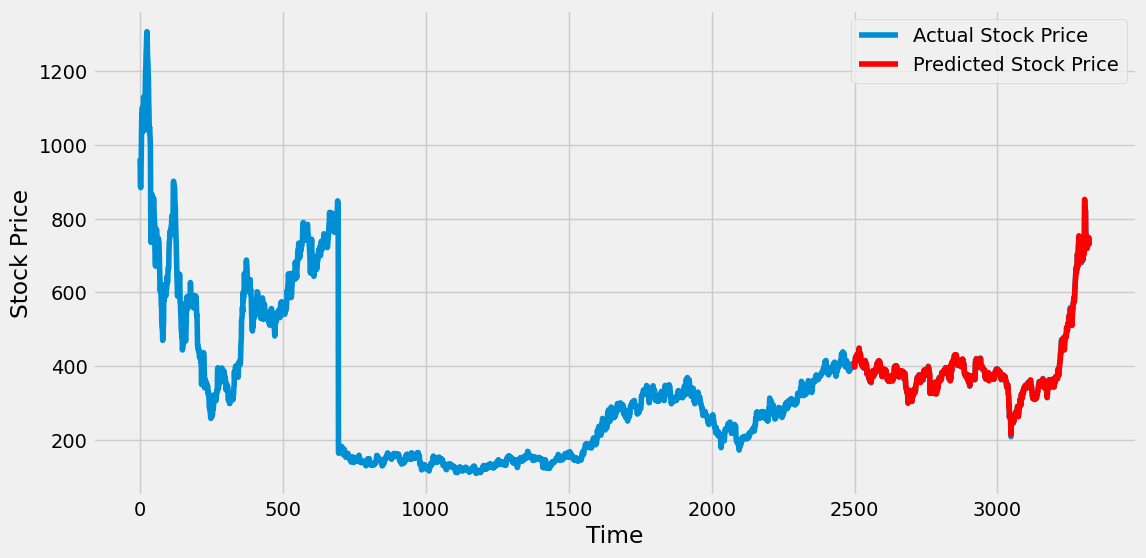

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your actual stock prices and predicted_price is the predicted prices for the last part of the timeframe

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual stock prices for the entire timeframe
plt.plot(data, label='Actual Stock Price')

# Plot the predicted prices, starting from the index where they overlap with actual data
plt.plot(range(len(data) - len(y_pred), len(data)), y_pred, color='red', label='Predicted Stock Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_valid contains actual values and y_pred contains predicted values

# Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_valid, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 3.002515159781313
Mean Absolute Error: 1.1936925880923452
R-squared (R2) Score: 0.9996834803066645


# Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_valid)


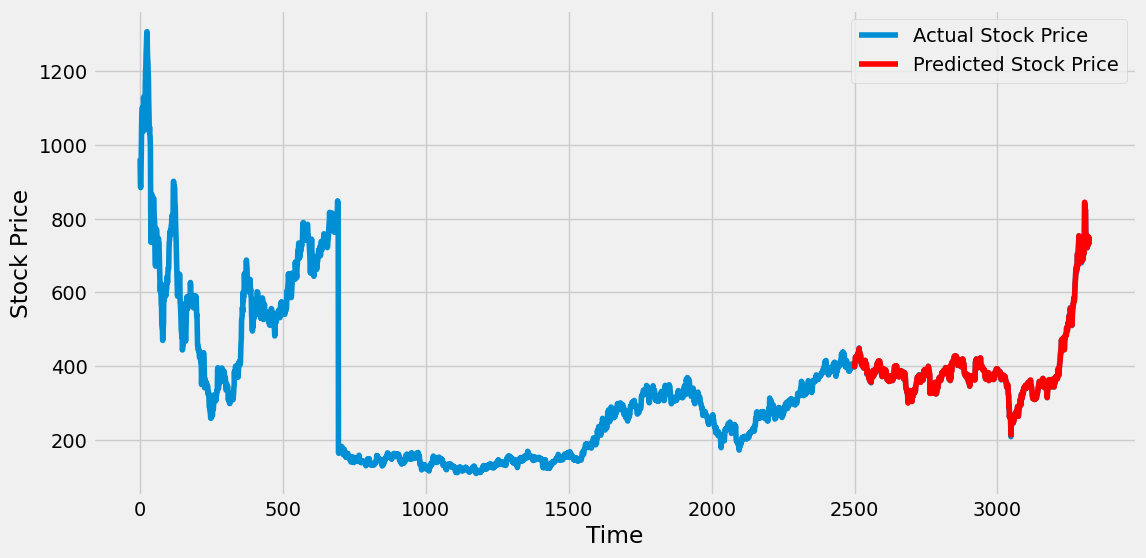

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your actual stock prices and predicted_price is the predicted prices for the last part of the timeframe

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual stock prices for the entire timeframe
plt.plot(data, label='Actual Stock Price')

# Plot the predicted prices, starting from the index where they overlap with actual data
plt.plot(range(len(data) - len(y_pred), len(data)), y_pred, color='red', label='Predicted Stock Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_valid contains actual values and y_pred contains predicted values

# Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_valid, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1.503125158087174
Mean Absolute Error: 0.8317508103547185
R-squared (R2) Score: 0.9998415432766317


# Apply XGBoost

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)


In [ ]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_valid)


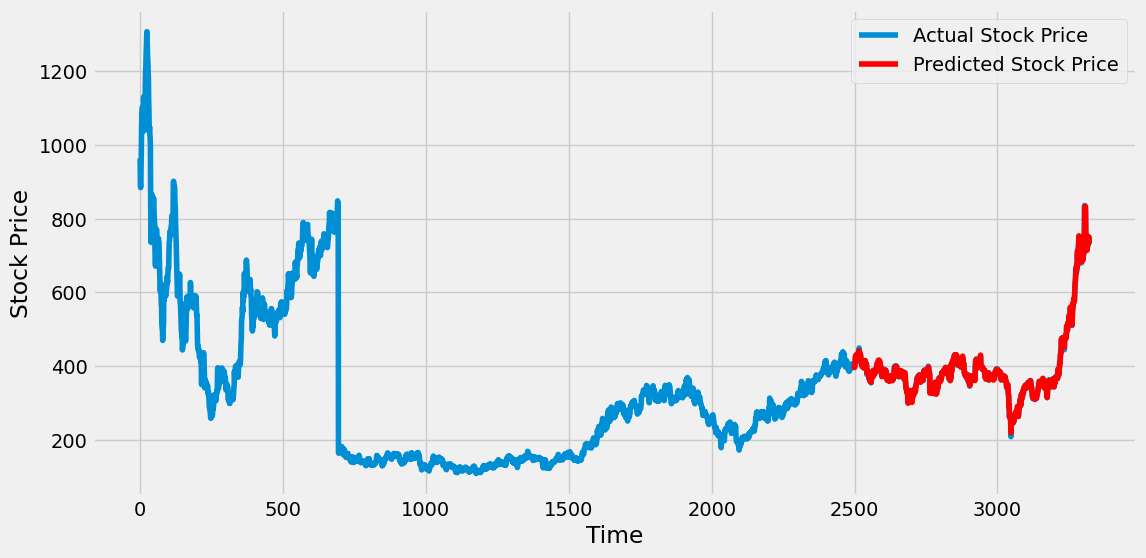

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your actual stock prices and predicted_price is the predicted prices for the last part of the timeframe

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual stock prices for the entire timeframe
plt.plot(data, label='Actual Stock Price')

# Plot the predicted prices, starting from the index where they overlap with actual data
plt.plot(range(len(data) - len(y_pred), len(data)), y_pred, color='red', label='Predicted Stock Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_valid contains actual values and y_pred contains predicted values

# Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_valid, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 6.1922417092641515
Mean Absolute Error: 1.7175430168068424
R-squared (R2) Score: 0.9993472251287423


# complete XGBoost

# Apply LSTM

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
import tensorflow as tf

In [ ]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


In [ ]:
# model = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
# last_layers[-2].output
# model = tf.keras.Model(inputs=model.input, outputs=last_layer)

58889256/58889256 [==============================] - 2s 0us/step


NameError: name 'last_laye' is not defined

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


# Reshape the data to fit the VGG16 model input shape
x_train_images = np.array([np.resize(img, (224, 224, 3)) for img in X_train_scaled])
x_valid_images = np.array([np.resize(img, (224, 224, 3)) for img in X_valid_scaled])

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
output_layer = base_model.layers[-2].output

# Define a new model for feature extraction
feature_extraction_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

# Extract features
features_train = feature_extraction_model.predict(x_train_images)
features_valid = feature_extraction_model.predict(x_valid_images)


26/26 [==============================] - 484s 18s/step


In [ ]:
features_train.head()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
features_valid.head()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:

# x_train_images = np.expand_dims(X_train, axis=-1)
# x_test_images = np.expand_dims(X_valid, axis=-1)

# # Repeat the single channel to create 3 channels (RGB)
# x_train_images = np.repeat(x_train_images, 3, axis=-1)
# x_test_images = np.repeat(x_test_images, 3, axis=-1)

In [ ]:
y_train.shape

In [ ]:
# x_test_images.shape

In [ ]:
# x_train_images.shape

In [ ]:
# from skimage.transform import resize
# x_train_images_resized = np.array([resize(img, (224, 224)) for img in x_train_images])
# x_test_images_resized = np.array([resize(img, (224, 224)) for img in x_test_images])

In [ ]:
# x_train_images_resized.shape

In [ ]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Flatten the output of VGG16
# flatten = Flatten()(base_model.output)

# # Add your own fully connected layers
# fc1 = Dense(256, activation='relu')(flatten)
# output = Dense(1)(fc1)  # No activation function for regression

# # Create a new model
# # model = Model(inputs=base_model.input, outputs=output)

# last_layer = model.layers[-2].output
# model = tf.keras.Model(inputs=base_model.input, outputs=last_layer)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(X_train)
# x_test_scaled = scaler.transform(X_valid)

# # Reshape the data to have 1 channel (grayscale)
# x_train_images = np.expand_dims(x_train_scaled, axis=-1)
# x_test_images = np.expand_dims(x_test_scaled, axis=-1)

# # Repeat the single channel to create 3 channels (RGB)
# x_train_images = np.repeat(x_train_images, 3, axis=-1)
# x_test_images = np.repeat(x_test_images, 3, axis=-1)


# x_train_images_resized = np.array([np.resize(img, (224, 224, 3)) for img in x_train_images])
# x_test_images_resized = np.array([np.resize(img, (224, 224, 3)) for img in x_test_images])


# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# output_layer = base_model.layers[-2].output

# # Define a new model that takes the input of VGG16 and outputs the features
# feature_extraction_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

# # Extract features using the new model
# features_train = feature_extraction_model.predict(x_train_images_resized)
# features_test = feature_extraction_model.predict(x_test_images_resized)
# # Extract features using the new model
# features_train_2nd_last = feature_extraction_model.predict(x_train_images)
# features_test_2nd_last = feature_extraction_model.predict(x_test_images)

# Apply ARIMA
